In [1]:
using PyPlot

In [2]:
using EMD
using Splines

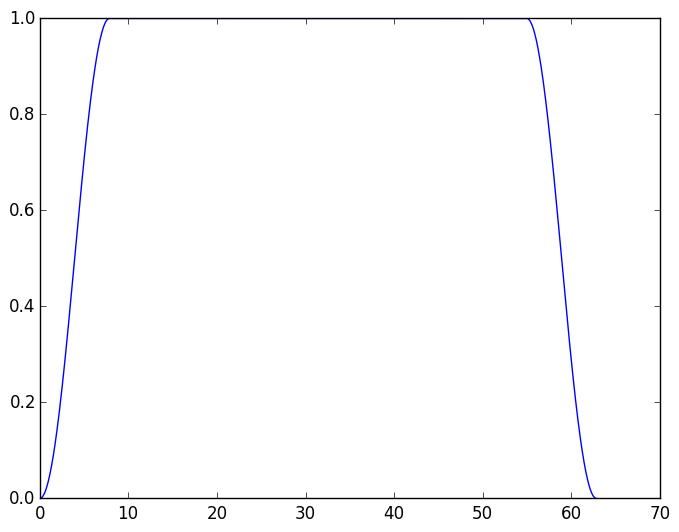

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f503336b310>

In [10]:
n = 1000
t = [linspace(0,20*pi,n);]
# y = cos(2pi*t) + cos(8pi*t) + 0.25 * cos(pi*t)

# sigma = 600
# window = exp(-(t-mean(t)).^2/sigma)

#Tukey window
alpha = 0.25
window = zeros(n)
for i = 0:n-1
    if i < alpha * (n-1)/2
        window[i+1] = 0.5*(1 + cos(pi*(2*i/(alpha*(n-1)) - 1)))
    elseif i < (n-1)*(1-alpha/2)
        window[i+1] = 1
    else
        window[i+1] = 0.5*(1 + cos(pi*(2*i/(alpha*(n-1)) + 1 - 2/alpha)))
    end
end

#Oscillate with a cosine
s1 = cos(5*pi*t + cos(0.25*pi*t))

#Follow a line path
s2 = zeros(t)
for i = 1:n
    freq = 0.01pi*t[i]#(t[i] <= t[n/2])? 0.02pi*t[i] : 0.02pi*(2*t[n/2])
    s2[i] = 2 * sin(freq*t[i])
end

y  = window.*(s1 + s2)
plot(t,window)


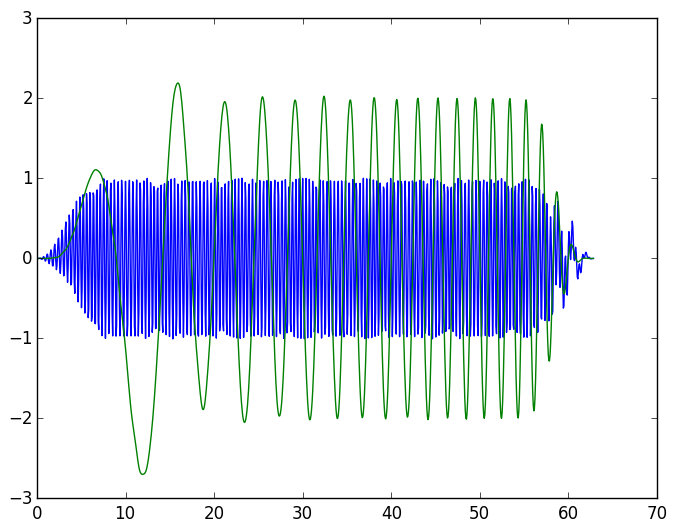

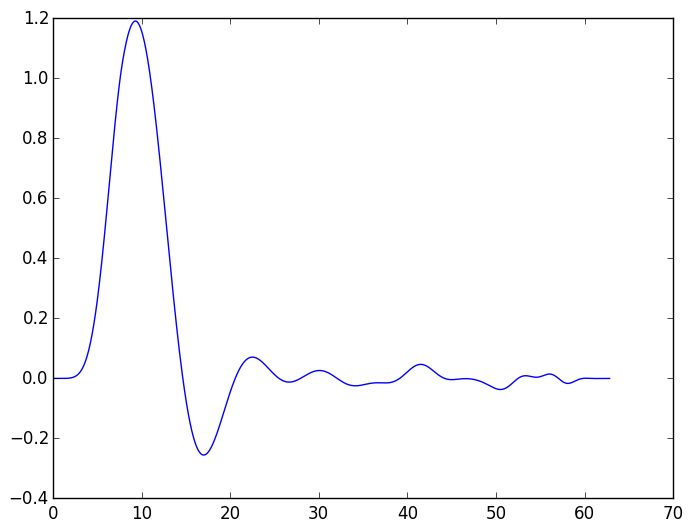

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5033033050>

In [12]:
N = 2
order = 10
n = length(y)
toldev = 0.3
tolzero = 1e-1

f = IMF(y,t, toldev, tolzero, order, N, window)

temp = y
for i = 1:N
    plot(t,f[:,i])
    temp = temp - f[:,i]
end

#@show(f)

# maxarray, minarray, tmax, tmin = findExtrema(temp, t)
# p = min(order,length(maxarray)-2)
# p = Int(2*floor(p/2))
# @show(p)
# @show(maxarray)
# S1 = Spline(maxarray, tmax,p )
# p = min(order,length(minarray)-2)
# p = Int(2*floor(p/2))
# S2 = Spline(minarray, tmin, p)
figure()
plot(t,temp)
# axis([0,10,-1e-5,1e-5])
# # @show(temp)
# plot(t,S1(t),"red")
# plot(t,S2(t),"black")
# plot(tmax,max,"red")
# plot(tmin,min)
# @show(p)

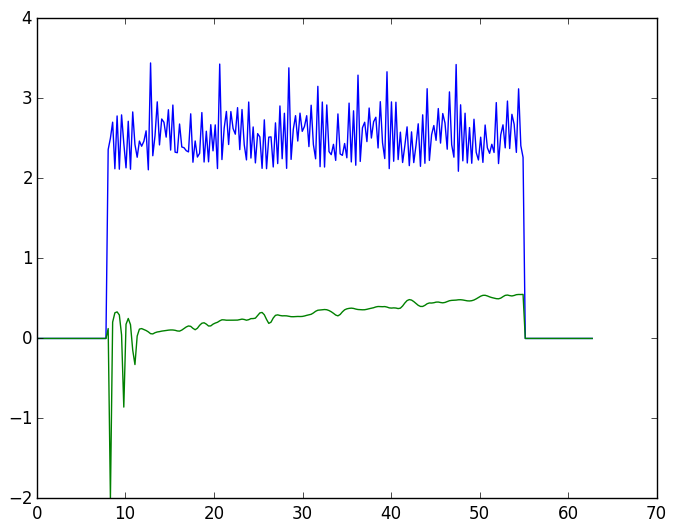

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f50333c0e10>

In [9]:
# calculate instantaneous frequency

x = t + 1e-8
step = 2
x = x[1:step:end]
window_phi = window[1:step:end]
window_phi[window_phi.<1] = 0
# for i =1:N
#     H1 = Spline(f[:,i], t, 4)
#     A = SplineEvalMatrix(H1.B, x,0,true)
#     phi = 1/(2pi)*(H1(x).*H1(x,1,true) - H1(x, 1).*H1(x,0,true))./(H1(x).^2 + H1(x,0,true).^2)
#     plot(x, window_phi.*phi)
#     #@show(H1(x))
#     #@show(A[:,1:10])
# end

Phi = IF(f, t, x, 4, window_phi)

plot(x, Phi[:,1])
plot(x, Phi[:,2], color="green")
